# ML-3 Classification using Decision Tree

Pada praktik kali ini, kita akan coba mengembangkan model Decision Tree yang dapat memprediski apakah seseorang beresiko menderita diabetes atau tidak.

#Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier           # library algoritma Decision Tree
from sklearn.model_selection import train_test_split      # library split data
from sklearn import metrics                               # library evaluation metrics
from sklearn.metrics import classification_report         # library laporan klasifikasi


#Load Dataset

In [ ]:
df = pd.read_csv('patient_dataset.csv')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Terdapat 8 feature:
- Pregnancies
- Glucose
- BooldPressure
- SkinThickness
- Insulin
- BMI
- DiabetesPedigreeFunction
- Age

dan satu label, yakni Outcome:

- Label 0 = tidak berpotensi menderita diabetes
- Label 1 = berpotensi menderita diabetes

#Data Exploration
**Pisahkan X dan Y dari dataset**

Salah satu kelebihan algoritma Decision Tree adalah kita tidak perlu menormalisasi feature.

In [ ]:
X = df.iloc[:,:-1].values # Features
Y = df.iloc[:,-1].values  # Target variable

In [ ]:
# Hasil pemisahan X dan Y
print(X, '\n')
print(Y)


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]] 

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1

**Splitting Data**

Split data menjadi:
- training set (X_train, y_train)
- test set (X_test, y_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42) #split menjadi 80% training set and 20% test set

#Modeling
Algoritma Decision Tree memiliki banyak hyperparameter yang bisa kita setel (tuning hyperparameter). Empat diantaranya adalah:

Hpyerparameter | Keterangan
---|---
criterion | Fungsi untuk mengukur kualitas sebuah split
max_depth | Kedalaman maksimum tree
max_leaf_nodes | Jumlah leaf node maksimum
random_state | Mengontrol ke-random-an algoritma

Hasil tuning hyperparameter yang tepat dapat meningkatkan performa model.

**Note:**

Jika kita tidak tahu secara pasti kegunaan hyperparameter, kita bisa menggunakan setelan default dengan cara mengosongkan hyperparameter.

In [ ]:
# Model dengan hyperparameter default
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train,y_train)

#Model dengan tuning hyperparameter
model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, y_train)

#Evaluation

**Mengevaluasi Performa Model dengan Hyperparameter Default**

In [ ]:
# hasil prediksi training set
y_pred_train_default = model_default.predict(X_train)

#hasil prediksi test set
y_pred_default = model_default.predict(X_test)

#Train set score
print('Train Accuracy :', metrics.accuracy_score(y_train, y_pred_train_default))
print('Test Precission :', metrics.precision_score(y_train,y_pred_train_default))
print('Test Recall :', metrics.recall_score(y_train, y_pred_train_default),'\n')

#Test set score
print('Train Accuracy :', metrics.accuracy_score(y_test, y_pred_default))
print('Test Precission :', metrics.precision_score(y_test,y_pred_default))
print('Test Recall :', metrics.recall_score(y_test, y_pred_default))

Train Accuracy : 1.0
Test Precission : 1.0
Test Recall : 1.0 

Train Accuracy : 0.7532467532467533
Test Precission : 0.6440677966101694
Test Recall : 0.6909090909090909


**Mengevaluasi Performa Model dengan Tuning Hyperparameter**

In [ ]:
#Hasil prediksi  training set
y_pred_train = model_DT.predict(X_train)

#Hasil prediksi test set
y_pred = model_DT.predict(X_test)

#Train set score
print('Train Accuracy   :', metrics.accuracy_score(y_train,y_pred_train))
print('Train Precission :', metrics.precision_score(y_train,y_pred_train))
print('Train Recall     :', metrics.recall_score(y_train,y_pred_train),'\n')

#Test set score
print('Test Accuracy    :', metrics.accuracy_score(y_test,y_pred))
print('Test Precison    :', metrics.precision_score(y_test, y_pred))
print('Test Recall      :', metrics.recall_score(y_test,y_pred))

Train Accuracy   : 0.7719869706840391
Train Precission : 0.7239263803680982
Train Recall     : 0.5539906103286385 

Test Accuracy    : 0.7727272727272727
Test Precison    : 0.7272727272727273
Test Recall      : 0.5818181818181818


Berdasarkan hasil evaluasi performa:

- model dengan hyperparameter default mengalami overfitting
- model dengan tuning hyperparameter sudah **good fit**, meskipun memiliki train set score yang lebih rendah



**Generate Classification Report**

Kita juga dapat menampilkan hasil evaluasi model menggunakan `classification report`.

In [ ]:
nama_label = ['Tidak berpotensi diabetes','Berpotensi diabetes']

print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(y_test,y_pred_default,target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hyperparamter:\n')
print(classification_report(y_test,y_pred,target_names=nama_label))

Classification Report Model dengan Hyperparameter Default:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.82      0.79      0.80        99
      Berpotensi diabetes       0.64      0.69      0.67        55

                 accuracy                           0.75       154
                macro avg       0.73      0.74      0.74       154
             weighted avg       0.76      0.75      0.76       154



Classification Report Model dengan Tuning Hyperparamter:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



Classification report menampilkan informasi yang lebih detail dan banyak dibanding evaluation metrics.

#Men-Generate Tree

**Tree Model dengan Hyperparameter Default**

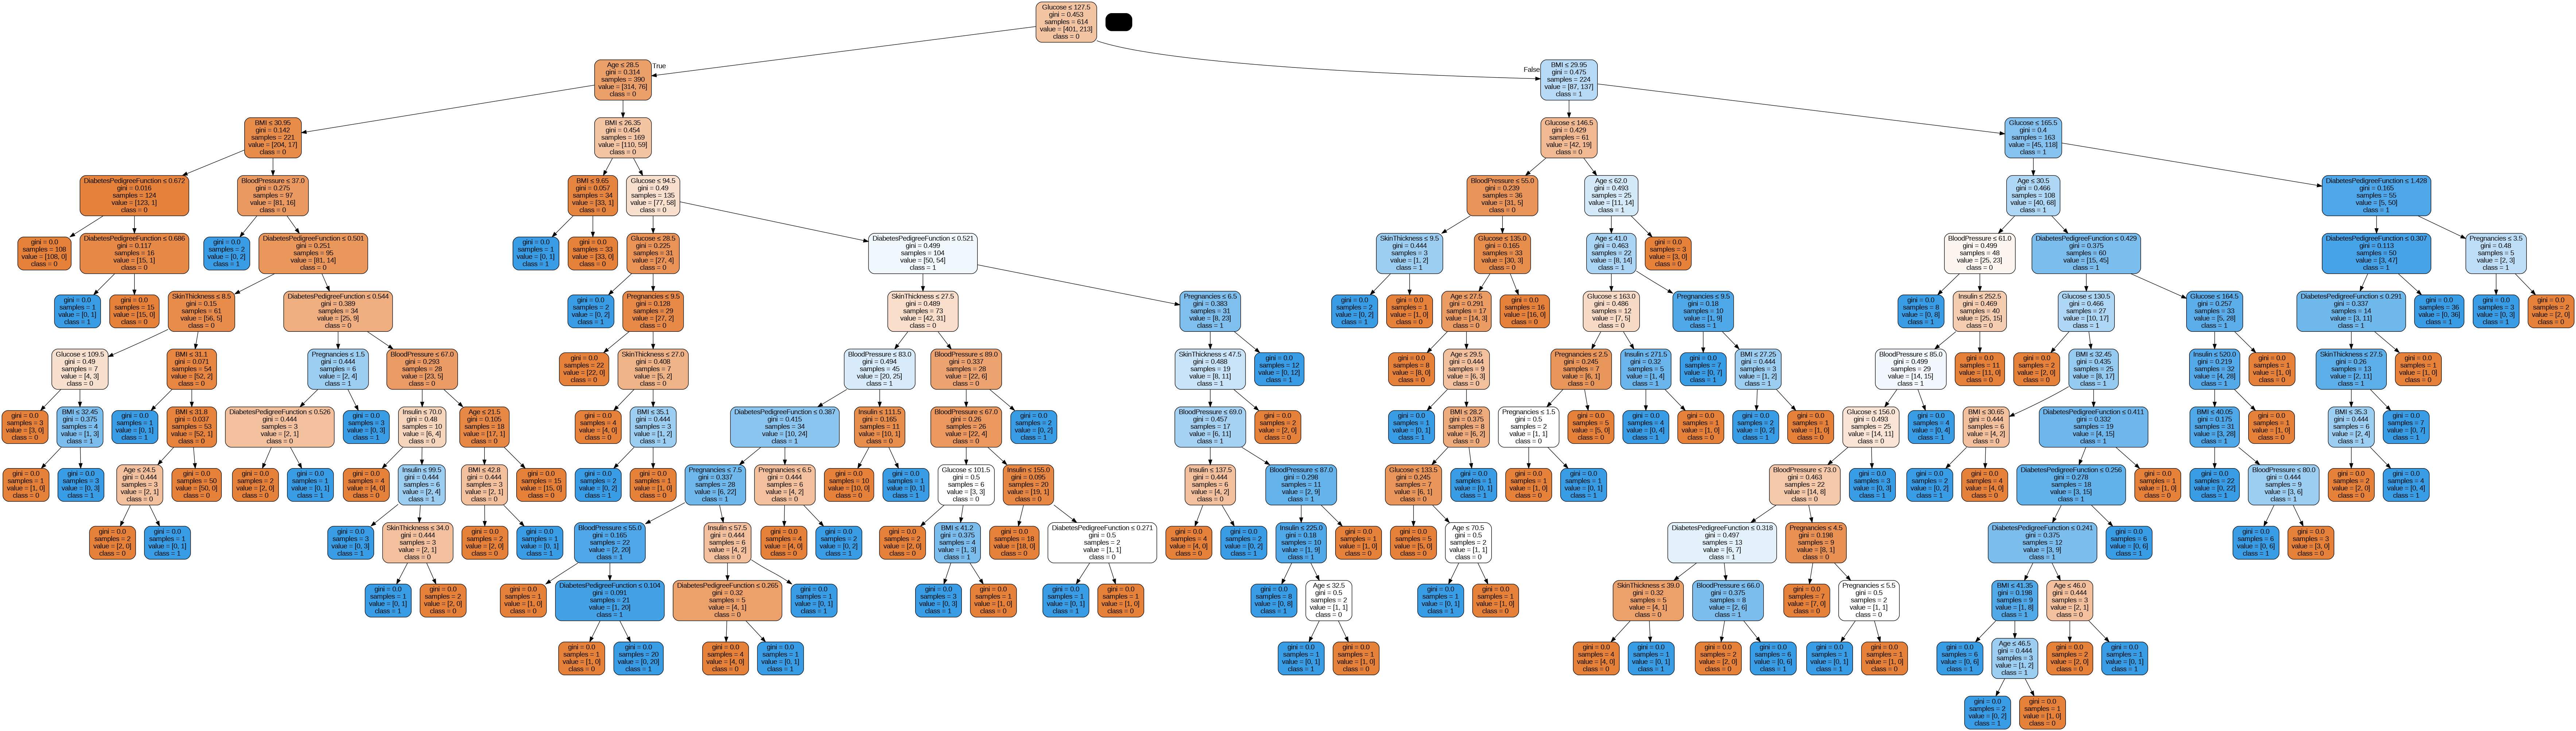

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_default.png')
Image(graph.create_png())

**Tree Model dengan Tuning Hyperparameter**

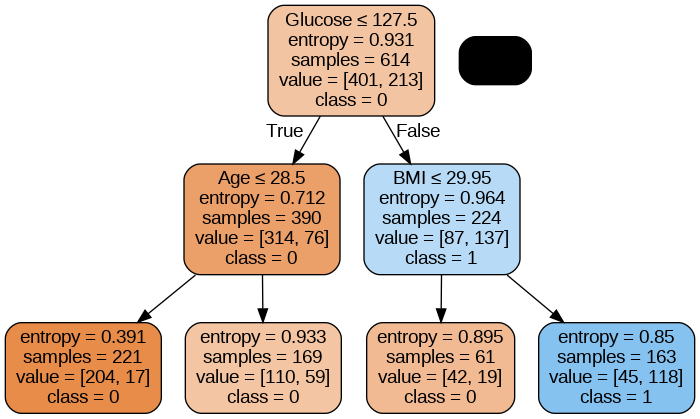

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

Manakah tree yang lebih baik menurut kamu? Kemukakan pendapatmu beserta alasannya!

Menurut saya, model yang lebih baik adalah model yang kedua. Pada model pertama, hasil yang diperoleh terlalu detail dan berpatok pada data training. Sementara itu, pada model kedua

**FYI**: Image tree bisa kita download via side menu Colab.

**Perhitungan Skor Feature**

Kita juga dapat memeriksa feature apa yang paling penting berdasarkan score feature.

Feature : Pregnancies Score :  0.06095601834669191 %


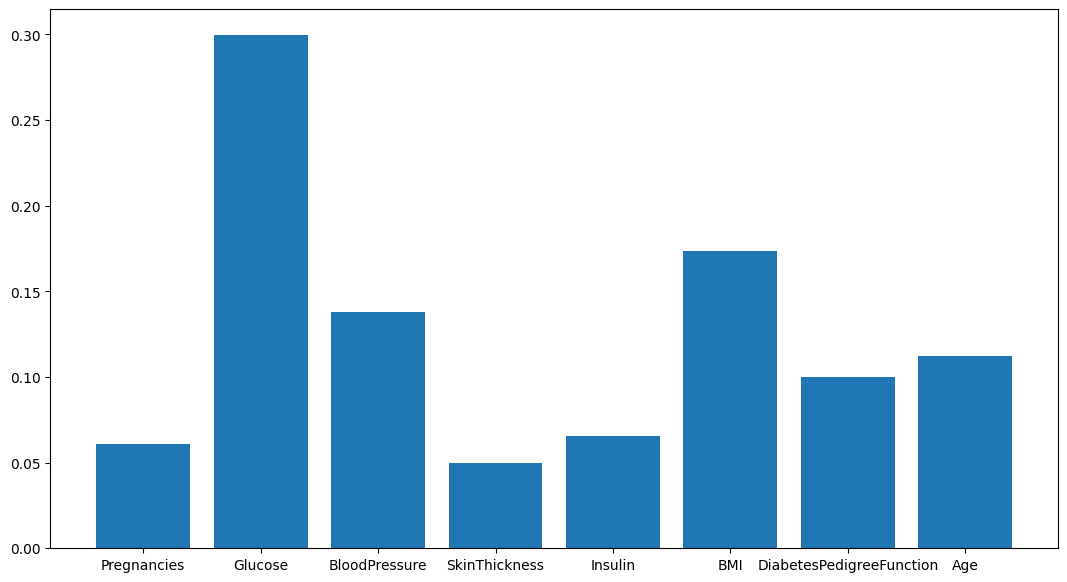

Feature : Glucose Score :  0.2996592658003697 %


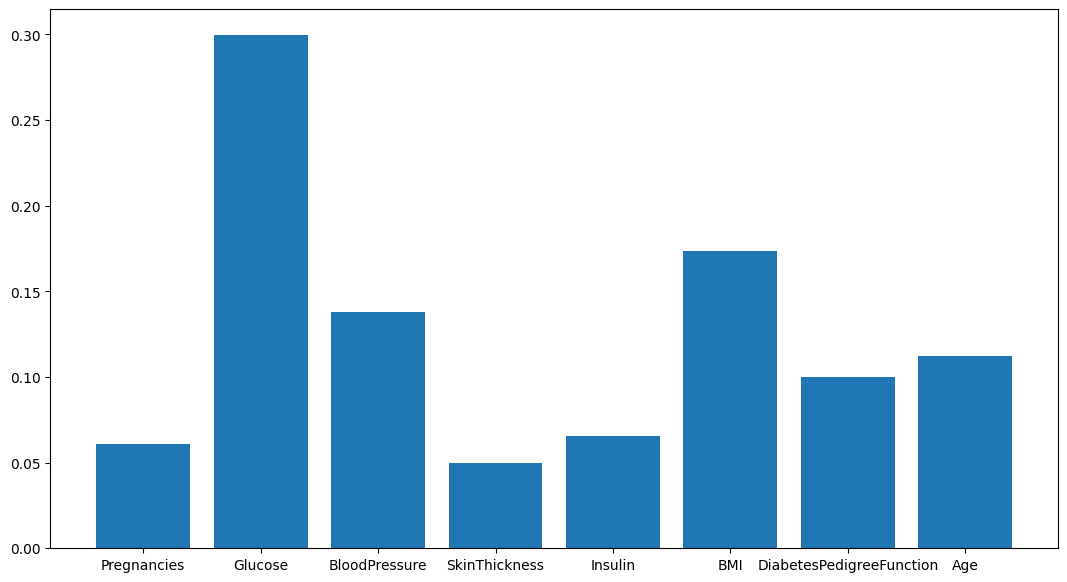

Feature : BloodPressure Score :  0.1378586605124949 %


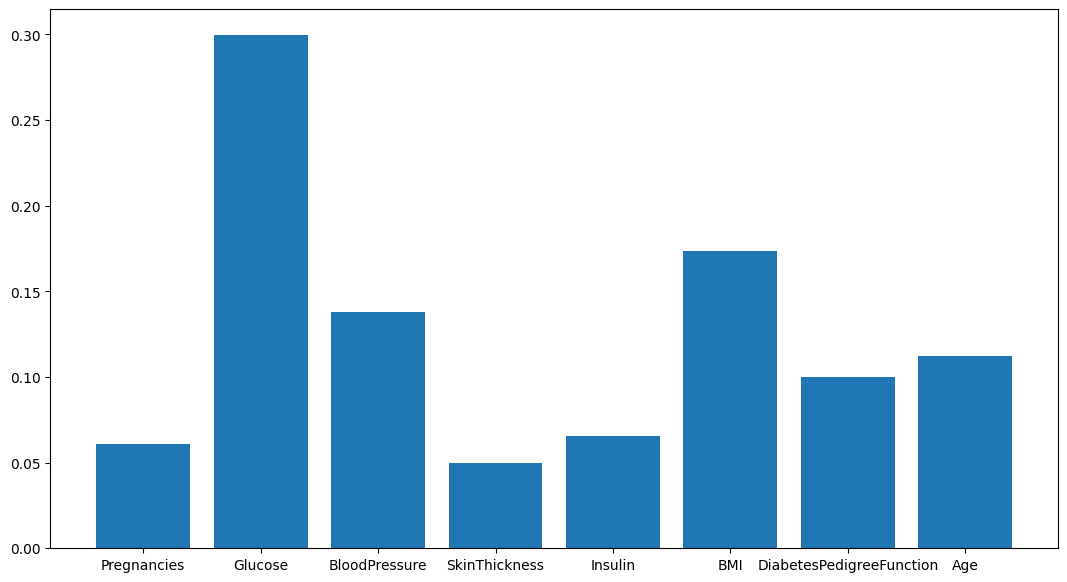

Feature : SkinThickness Score :  0.05005861830977832 %


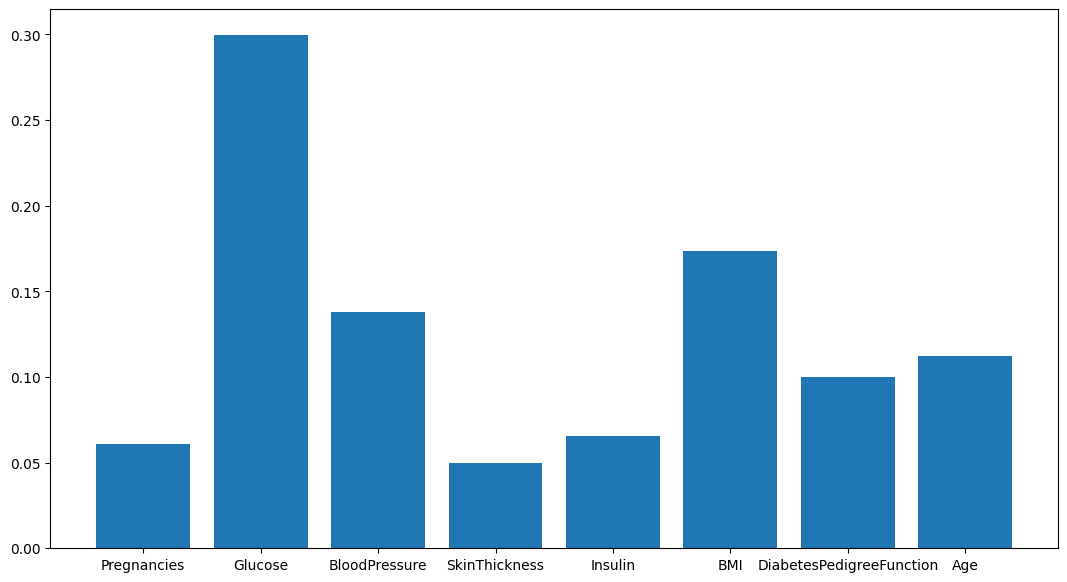

Feature : Insulin Score :  0.0652943110082332 %


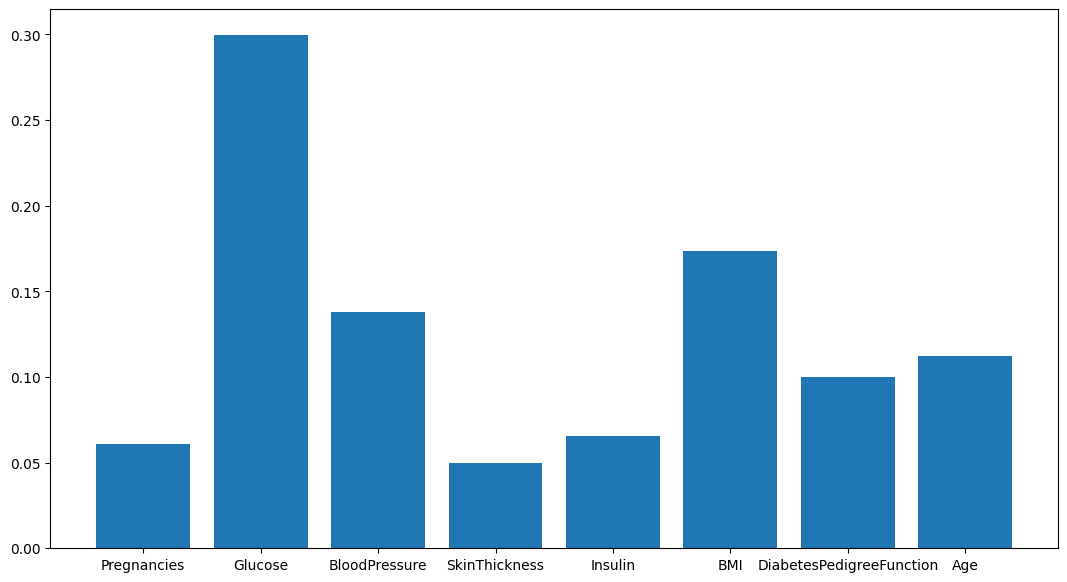

Feature : BMI Score :  0.17368418761580853 %


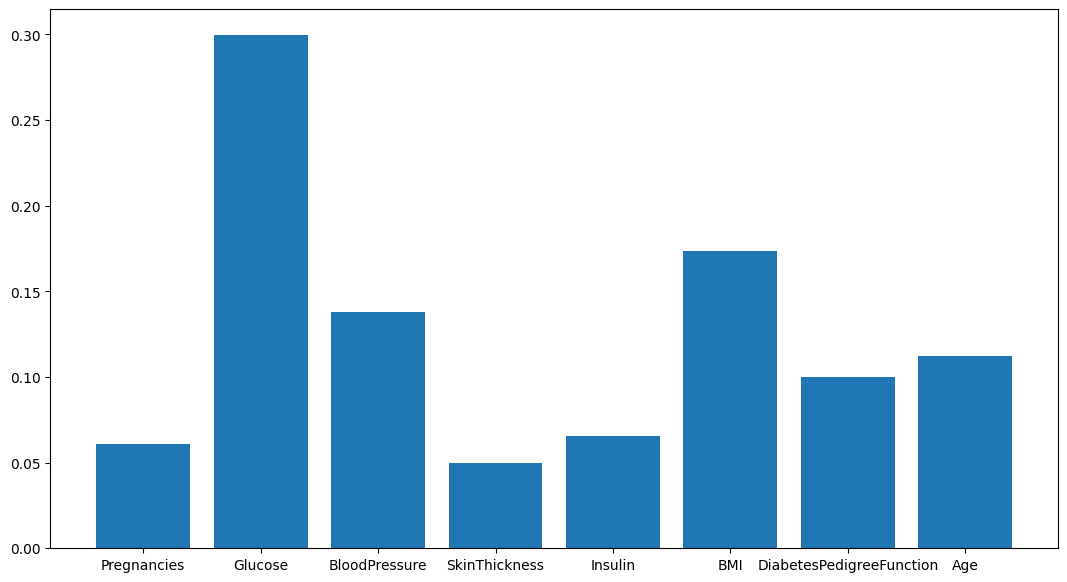

Feature : DiabetesPedigreeFunction Score :  0.10003918069232996 %


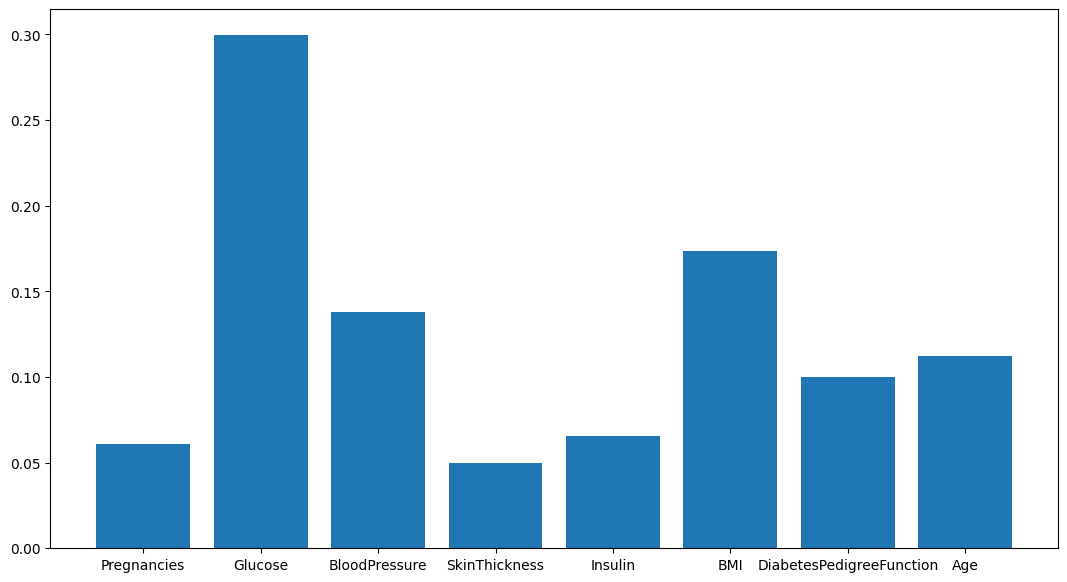

Feature : Age Score :  0.11244975771429348 %


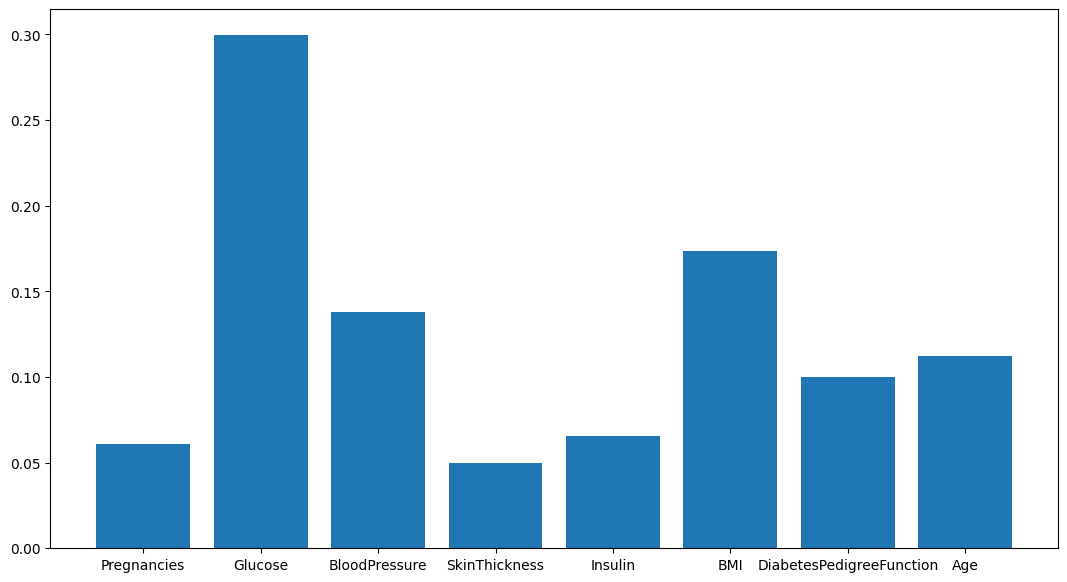

In [ ]:
importance = model_default.feature_importances_ #khusus model dengan hyperparameter default

for i,v in enumerate(importance):
  print('Feature :', feature_cols[i],'Score : ', v, '%')

  #Membuat plot
  plt.figure(figsize=(13,7))
  plt.bar([x for x in feature_cols], importance)
  plt.show()

#Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.



In [ ]:
#Prediksi data baru menggunakan model dengan tuning hyperparameter

#Input data baru
Pregnancies = float(input('Input Pregnancies = '))
Glucose = float(input('Input Glucose = '))
BloodPressure = float(input('Input Blood Preasure = '))
SkinThickness = float(input('Input Skin Thickness = '))
Insulin = float (input('Input Insulin = '))
BMI = float(input('Input BMI = '))
DiabetesPedigreeFunction = float(input('Input Diabetes Pedigree Function = '))
Age = float(input('Input Age = '))
data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,BMI, DiabetesPedigreeFunction, Age]]

#Memprediksi data baru
hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

#Cetak hasil prediksi
if hasil_prediksi ==0:
  print('\nTidak berpotensi menderita diabetes!')
else:
  print('\nBerpotensi menderita diabetes!')



Input Pregnancies = 12
Input Glucose = 12
Input Blood Preasure = 12
Input Skin Thickness = 12
Input Insulin = 12
Input BMI = 12
Input Diabetes Pedigree Function = 12
Input Age = 12

Tidak berpotensi menderita diabetes!


<ipython-input-15-ca890a5c2bfb>:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil_prediksi = int(hasil_prediksi)


# Exercise (Latihan)

Lakukan pemodelan ulang menggunakan dataset yang sama!
1. Gunakan algoritma Decision Tree
2. Pilih 4 dari 8 feature yang tersedia
3. Lakukan tuning hyperparameter hingga mendapat model dengan performa terbaik
4. Generate tree model
5. Buat kesimpulan dari activity yang sudah dilakukan

In [ ]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
#Import Dataset
df = pd.read_csv('patient_dataset.csv')

##Data Eksplorasi

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
X = df.iloc[:, 0 :4].values
Y = df.iloc[:, -1].values

print(X, '\n')
print(Y)

[[  6 148  72  35]
 [  1  85  66  29]
 [  8 183  64   0]
 ...
 [  5 121  72  23]
 [  1 126  60   0]
 [  1  93  70  31]] 

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 

In [ ]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##Modelling

In [ ]:
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, y_train)

model_DT = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2, random_state=25)
model_DT = model_DT.fit(X_train, y_train)

##Evaluation

In [ ]:
y_pred_train_default = model_default.predict(X_train)

y_pred_default = model_default.predict(X_test)

print("Train Accuracy   :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Precission :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Train Recall     :", metrics.accuracy_score(y_train, y_pred_train_default), '\n')

print("Test Accuracy    :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Test Precission  :", metrics.accuracy_score(y_train, y_pred_train_default))
print("Test Recall      :", metrics.accuracy_score(y_train, y_pred_train_default))

Train Accuracy   : 1.0
Train Precission : 1.0
Train Recall     : 1.0 

Test Accuracy    : 1.0
Test Precission  : 1.0
Test Recall      : 1.0


In [ ]:
y_pred_train = model_DT.predict(X_train)

y_pred = model_DT.predict(X_test)

print("Train Accuracy   :", metrics.accuracy_score(y_train, y_pred_train))
print("Train Precission :", metrics.accuracy_score(y_train, y_pred_train))
print("Train Recall     :", metrics.accuracy_score(y_train, y_pred_train), '\n')

print("Test Accuracy    :", metrics.accuracy_score(y_test, y_pred))
print("Test Precission  :", metrics.accuracy_score(y_test, y_pred))
print("Test Recall      :", metrics.accuracy_score(y_test, y_pred))

Train Accuracy   : 0.7345276872964169
Train Precission : 0.7345276872964169
Train Recall     : 0.7345276872964169 

Test Accuracy    : 0.7402597402597403
Test Precission  : 0.7402597402597403
Test Recall      : 0.7402597402597403


##Generate Classification Report

In [ ]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print('Classification Report Model dengan Hyperparameter Default: \n')
print(classification_report(y_test, y_pred_default, target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hyperparameter\n')
print(classification_report(y_test, y_pred, target_names=nama_label))

Classification Report Model dengan Hyperparameter Default: 

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.74      0.71      0.72        99
      Berpotensi diabetes       0.51      0.55      0.53        55

                 accuracy                           0.65       154
                macro avg       0.62      0.63      0.62       154
             weighted avg       0.66      0.65      0.65       154



Classification Report Model dengan Tuning Hyperparameter

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.81      0.78      0.79        99
      Berpotensi diabetes       0.63      0.67      0.65        55

                 accuracy                           0.74       154
                macro avg       0.72      0.73      0.72       154
             weighted avg       0.75      0.74      0.74       154



##Men-Generate Tree

In [ ]:
#Tree Model dengan Hyperparameter Default
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_default.png')
Image(graph.create_png())

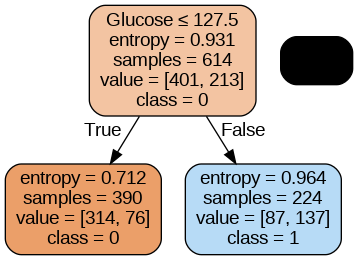

In [ ]:
#Tree Model dengan Tuning Hyperparameter
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Preganancies', 'Glucose', 'BloodPressure', 'SkinThickness']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = feature_cols,
                class_names = ['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

##Perhitungan Skor Feature

Feature : Preganancies Score : 0.1606870884063264 %


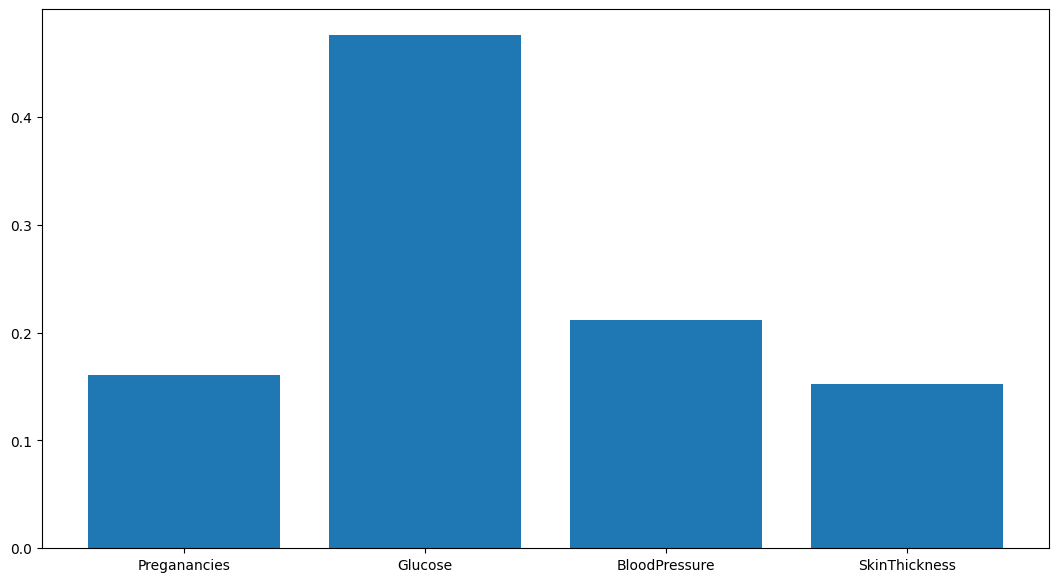

Feature : Glucose Score : 0.47588909042434857 %


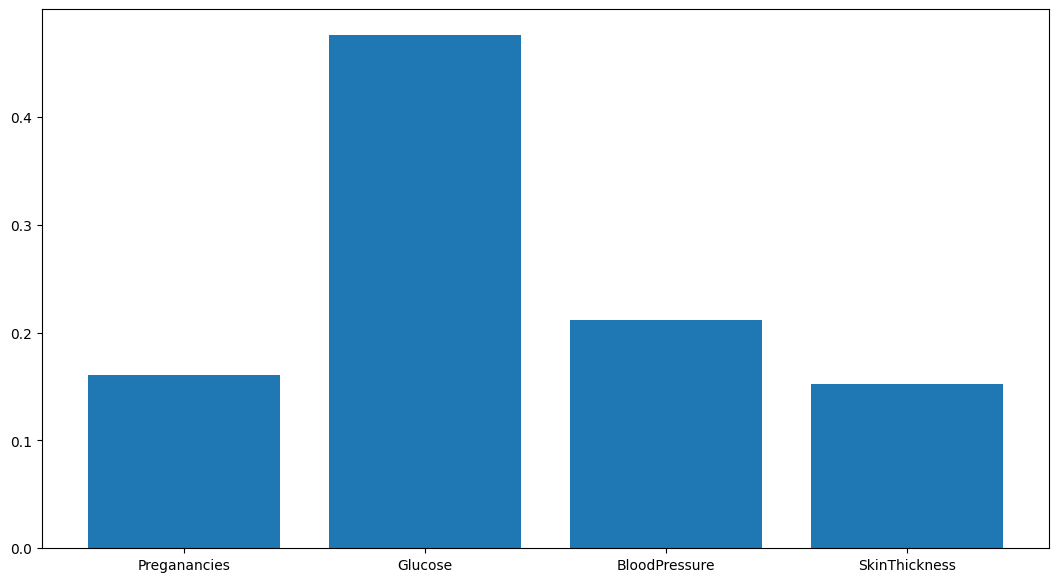

Feature : BloodPressure Score : 0.2114199915615487 %


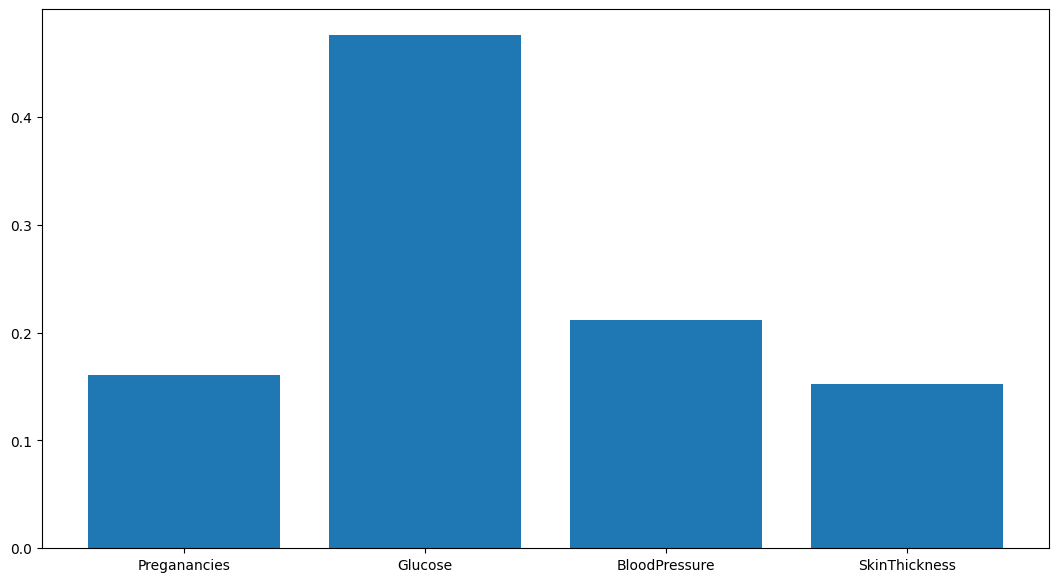

Feature : SkinThickness Score : 0.1520038296077763 %


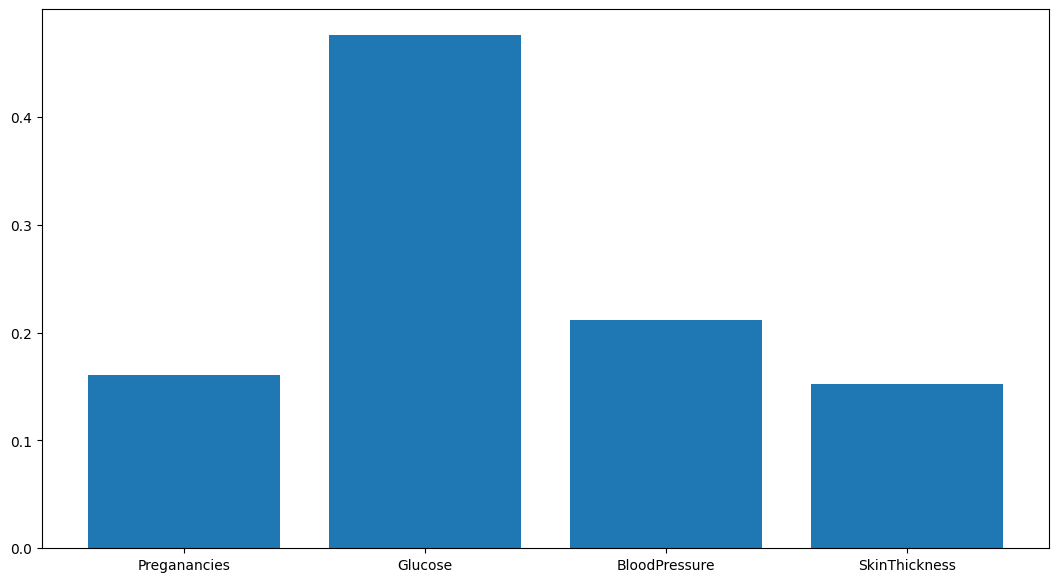

In [ ]:
importance = model_default.feature_importances_

for i, v in enumerate(importance):
  print('Feature :', feature_cols[i], 'Score :', v, '%')

  plt.figure(figsize=(13,7))
  plt.bar([x for x in feature_cols], importance)
  plt.show()

##Kesimpulan

Decision Tree adalah salah satu algoritma Supervised Learning yang memungkinkan kita membentuk sebuah tree dari dataset.

Tree ini kemudian bisa kita gunakan untuk memprediksi data baru.

Setelan hyperparameter yang tepat dapat meningkatkan perfomarma model.



###Prediksi Data Baru

In [ ]:
Pregnancies = float(input('Input Pregancies = '))
Glucose = float(input('Input Glucose = '))
BloodPressure = float(input('Input BloodPressure = '))
SkinThickness = float(input('Input SkinThickness = '))
data_baru = [[Pregnancies, Glucose, BloodPressure, SkinThickness]]

hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

if hasil_prediksi == 0:
  print('\nTidak berpotensi menderita diabetes!')
else:
  print('\nBerpotensi menderita diabetes')


Input Pregancies = 12
Input Glucose = 12
Input BloodPressure = 12
Input SkinThickness = 12

Tidak berpotensi menderita diabetes!


<ipython-input-29-ccfb2103d1d5>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  hasil_prediksi = int(hasil_prediksi)


In [ ]:
1